In [22]:

import torch
variable = "tasmax"

# tasmax-ALPS-normperperiod-past-future-standard 
# samples = torch.load(f"/r/scratch/groups/nm/downscaling/samples_cordexbench/Emulator_hist_future/ALPS/no-orog/prelim/maybritt_{variable}-ALPS-normpw-past-future/samples_train.pt")
# samples = torch.load(f"/r/scratch/groups/nm/downscaling/samples_cordexbench/Emulator_hist_future/ALPS/no-orog/prelim/maybritt_{variable}-ALPS-normperperiod-past-future-new/samples_train.pt")
# samples = torch.load(f"/r/scratch/groups/nm/downscaling/samples_cordexbench/Emulator_hist_future/ALPS/no-orog/prelim/maybritt_{variable}-ALPS-normperperiod-past-future-standard/samples_train.pt")
samples = torch.load(f"/r/scratch/groups/nm/downscaling/samples_cordexbench/Emulator_hist_future/ALPS/no-orog/prelim/maybritt_{variable}-ALPS-normsubtractlin-past-future-predictors-detrended-v2/samples_train.pt")
# samples = torch.load(f"/r/scratch/groups/nm/downscaling/samples_cordexbench/Emulator_hist_future/ALPS/no-orog/prelim/maybritt_{variable}-ALPS-normsubtractlin-past-future-predictors-raw/samples_train.pt")
samples_np = samples.squeeze(1).cpu().numpy()

# samples = torch.load(f"/r/scratch/groups/nm/downscaling/samples_cordexbench/Emulator_hist_future/ALPS/no-orog/prelim/maybritt_{variable}-ALPS-normpw/samples_train.pt")

In [53]:
import torch
import numpy as np
variable = "pr"
# samples /r/scratch/groups/nm/downscaling/samples_cordexbench/Emulator_hist_future/ALPS/no-orog/prelim/maybritt_pr-ALPS-normsubtractlin-past-future-predictors-detrended-v2/
# samples = torch.load(f"/r/scratch/groups/nm/downscaling/samples_cordexbench/Emulator_hist_future/ALPS/no-orog/prelim/maybritt_{variable}-ALPS-normsubtractlin-past-future-predictors-detrended-v2/samples_train.pt")
# samples = torch.load(f"/r/scratch/groups/nm/downscaling/samples_cordexbench/Emulator_hist_future/ALPS/no-orog/prelim/maybritt_pr-ALPS-normscalepw-past-future/samples_train.pt")
# samples = torch.load("/r/scratch/groups/downscaling/samples_cordexbench/Emulator_hist_future/SA/no-orog/pr/maybritt_scalepw_wd_v1/samples_train.pt")
samples = torch.load("/r/scratch/groups/downscaling/samples_cordexbench/Emulator_hist_future/ALPS/no-orog/pr/maybritt_scalepw_wd_v2/samples_train.pt")
samples_np = samples.squeeze(1).cpu().numpy()

In [54]:
import matplotlib.pyplot as plt

In [55]:
samples.shape

torch.Size([14610, 1, 128, 128, 9])

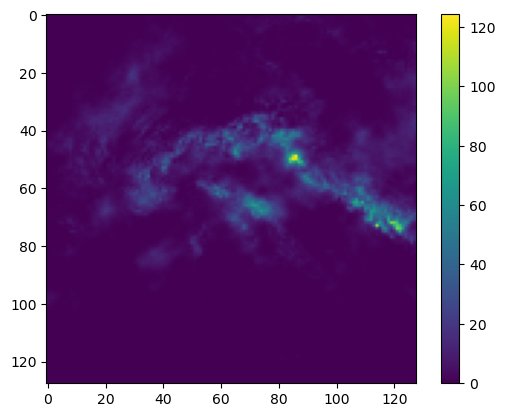

In [56]:
plt.imshow(samples[10,0,:,:, 0].cpu(), cmap='viridis')
plt.colorbar()

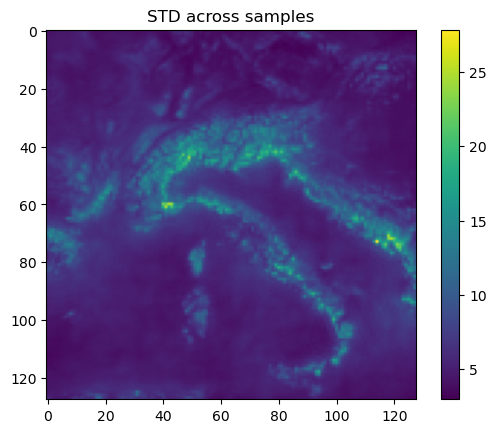

In [57]:
plt.imshow(samples[:,0,:,:, :].std(dim=(0, -1)).cpu(), cmap='viridis')
plt.title("STD across samples")
plt.colorbar();

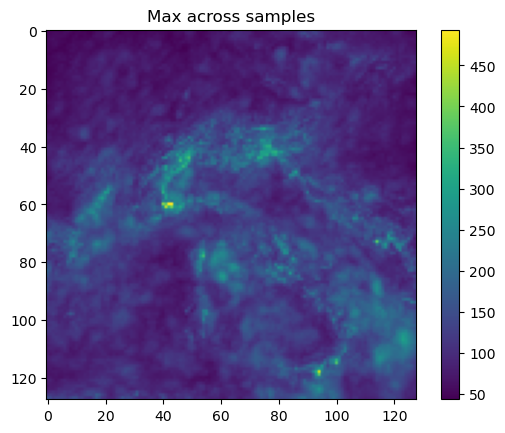

In [58]:
plt.imshow(samples[:,0,:,:, :].amax(dim=(0, -1)).cpu(), cmap='viridis')
plt.title("Max across samples")
plt.colorbar();

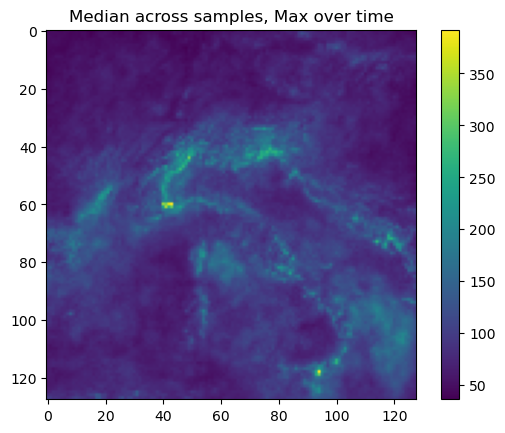

In [59]:
plt.imshow(samples[:,0,:,:, :].amax(dim=0).quantile(0.5, dim=-1).cpu(), cmap='viridis')
plt.title("Median across samples, Max over time")
plt.colorbar();

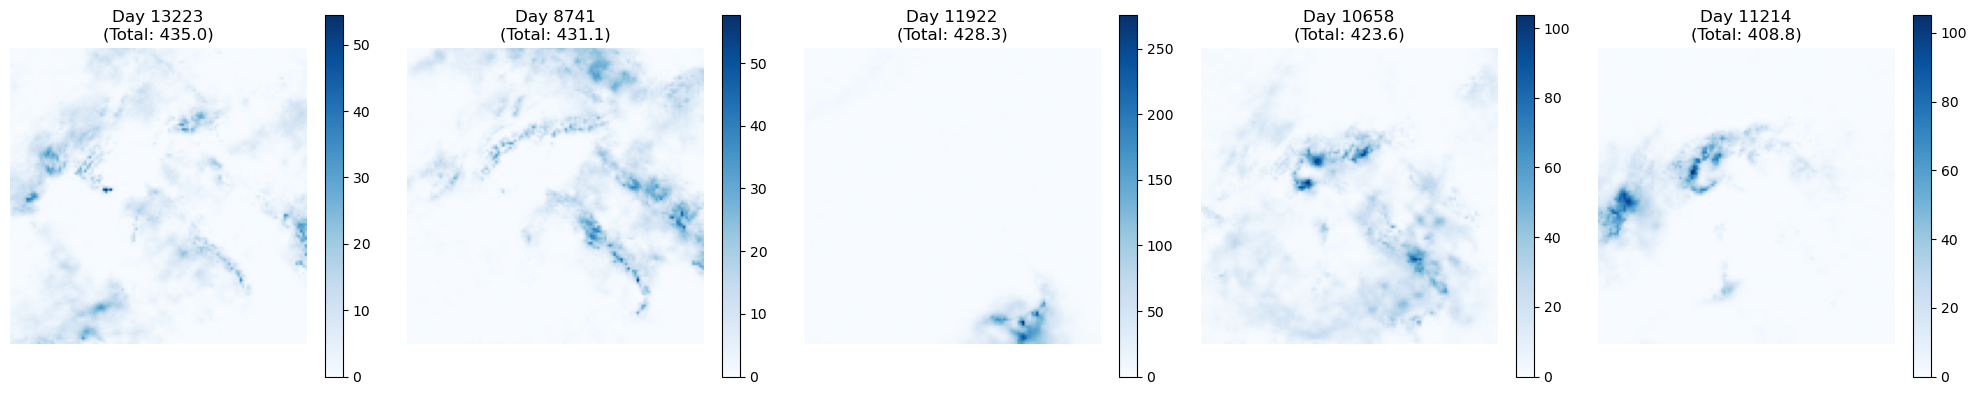

In [60]:
# Find the days with highest total rainfall
# Find the days with highest total rainfall at a single location
max_rainfall_per_day = samples_np.max(axis=(1, 2, 3))  # max over space and ensemble members
top_indices = np.argsort(max_rainfall_per_day)[-10:-5][::-1]  # top 5 days

# Plot example days with highest rainfall
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, idx in enumerate(top_indices):
    rainfall_map = samples_np[idx][...,0]# .mean(axis=-1)
    im = axes[i].imshow(rainfall_map, cmap='Blues')
    axes[i].set_title(f'Day {idx}\n(Total: {max_rainfall_per_day[idx]:.1f})')
    axes[i].axis('off')
    plt.colorbar(im, ax=axes[i])

plt.tight_layout()
plt.show()

In [61]:
domain = "ALPS"
DATA_PATH = "/r/scratch/users/mschillinger/data/cordexbench/"
folder = f"{domain}/{domain}_domain/train"
training_experiment = "Emulator_hist_future"
if domain == "ALPS":
    gcm_name = "CNRM-CM5"
else:
    gcm_name = "ACCESS-CM2"
period_training = "1961-1980_2080-2099"
hr_path = f'{DATA_PATH}/{folder}/{training_experiment}/target/pr_tasmax_{gcm_name}_{period_training}.nc'
hr_path

'/r/scratch/users/mschillinger/data/cordexbench//ALPS/ALPS_domain/train/Emulator_hist_future/target/pr_tasmax_CNRM-CM5_1961-1980_2080-2099.nc'

In [62]:
import xarray as xr
target = xr.open_dataset(hr_path)

In [63]:
target

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 14610, y: 128, x: 128)
Coordinates:
  * time     (time) datetime64[ns] 117kB 1961-01-01T12:00:00 ... 2099-12-31T1...
    lon      (y, x) float64 131kB ...
    lat      (y, x) float64 131kB ...
  * x        (x) float64 1kB 2.062e+03 2.075e+03 ... 3.638e+03 3.65e+03
  * y        (y) float64 1kB 1.412e+03 1.425e+03 1.438e+03 ... 2.988e+03 3e+03
Data variables:
    tasmax   (time, y, x) float32 957MB ...
    pr       (time, y, x) float32 957MB ...
Attributes: (12/26)
    description:                    Created by xios
    title:                          Created by xios
    Conventions:                    CF-1.6
    creation_date:                  2018-10-24T11:26:47Z
    name:                           EUR-11_CNRM-CERFACS-CNRM-CM5_historical_r...
    institute_id:                   CNRM
    ...                             ...
    references:                     http://www.umr-cnrm.fr/spip.php?article12...
    comment:                        CORDEX Europe EUR-11 CNRM-ALADIN 6.3 L91 ...
    c3s_disclaimer:                 This data has been produced in the contex...
    driving_experiment_comment:     Known issue correction: this simulation (...
    frequency:                      day
    tracking_id:                    hdl:21.14103/e0344943-4520-4786-94f8-4cbf...

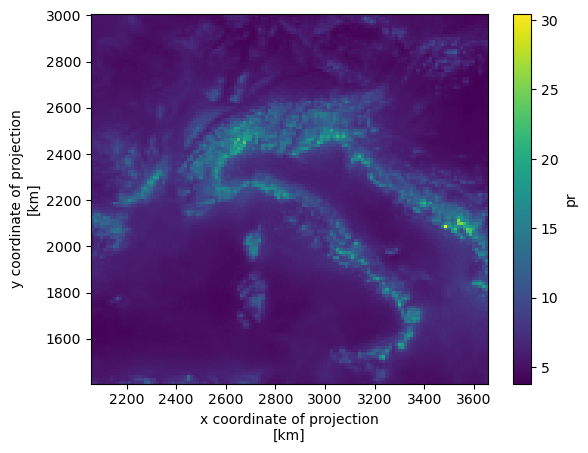

In [64]:
target[variable].std(dim="time").plot()

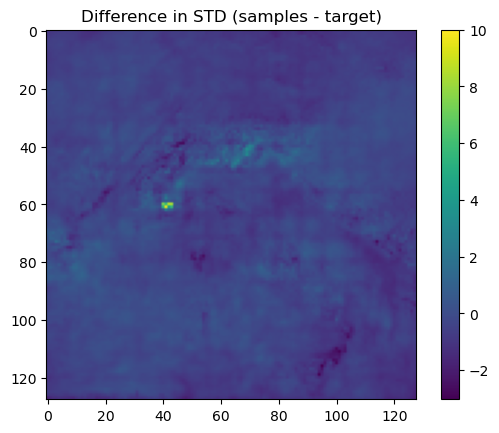

In [65]:
plt.imshow(samples[:,0,:,:, :].std(dim=(0, -1)).cpu().numpy() - np.flip(target[variable].std(dim="time").values, axis=0) , vmax = 10);
plt.title("Difference in STD (samples - target)")
plt.colorbar()

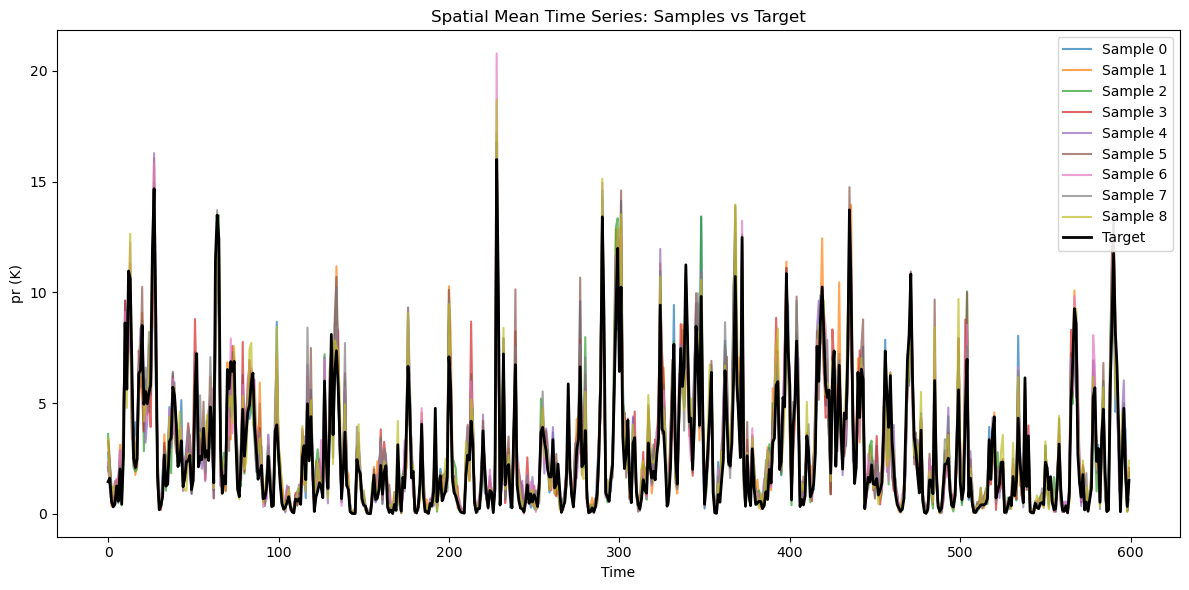

In [32]:
# Calculate spatial mean across y and x dimensions for samples and target
samples_mean = samples[:, :, :, :, :].mean(dim=(2, 3)) if hasattr(samples, 'mean') else samples[:, :, :, :, 0].cpu().numpy().reshape(samples.shape[0], samples.shape[1], -1).mean(axis=2)
if domain == "ALPS":
    target_mean = target[variable].mean(dim=('y', 'x'))
else:
    target_mean = target[variable].mean(dim=('lat', 'lon'))

# Convert to numpy if needed
if hasattr(samples_mean, 'numpy'):
    samples_mean = samples_mean.numpy()
else:
    samples_mean = samples_mean.cpu().numpy() if hasattr(samples_mean, 'cpu') else samples_mean

# Plot time series
plt.figure(figsize=(12, 6))
for i in range(samples.shape[-1]):
    plt.plot(samples_mean[:600, ...,i], label=f'Sample {i}', alpha=0.7)
plt.plot(target_mean.values[:600], label='Target', linewidth=2, color='black')
plt.xlabel('Time')
plt.ylabel(f'{variable} (K)')
plt.title('Spatial Mean Time Series: Samples vs Target')
plt.legend()
plt.tight_layout()
plt.show()

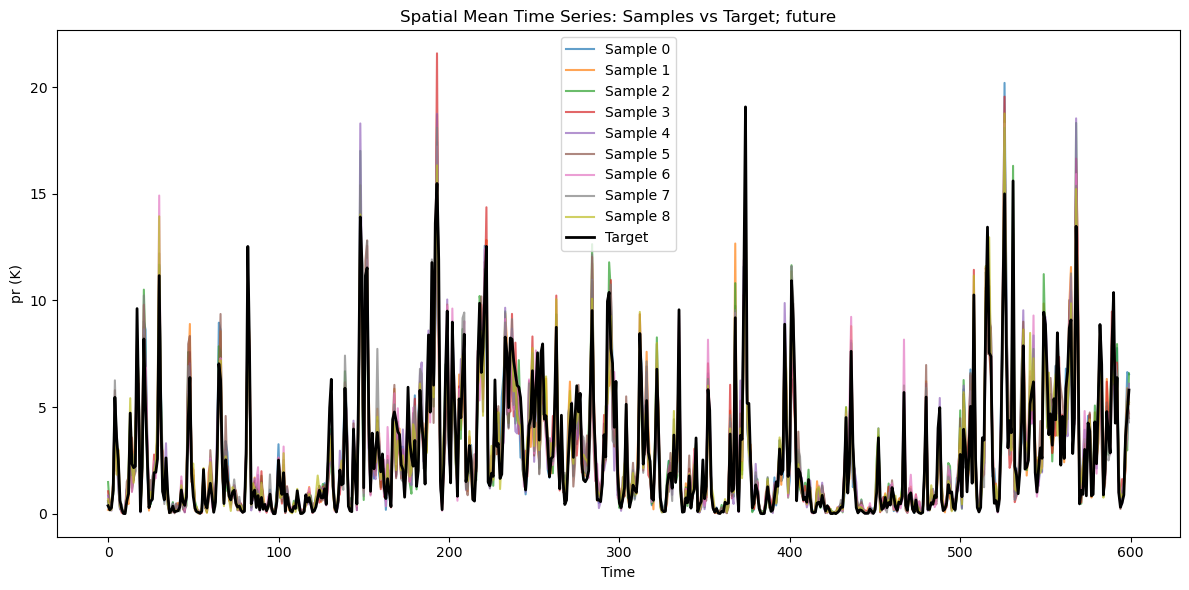

In [33]:
# Plot time series
plt.figure(figsize=(12, 6))
for i in range(samples.shape[-1]):
    plt.plot(samples_mean[-600:, ...,i], label=f'Sample {i}', alpha=0.7)
plt.plot(target_mean.values[-600:], label='Target', linewidth=2, color='black')
plt.xlabel('Time')
plt.ylabel(f'{variable} (K)')
plt.title('Spatial Mean Time Series: Samples vs Target; future')
plt.legend()
plt.tight_layout()
plt.show()

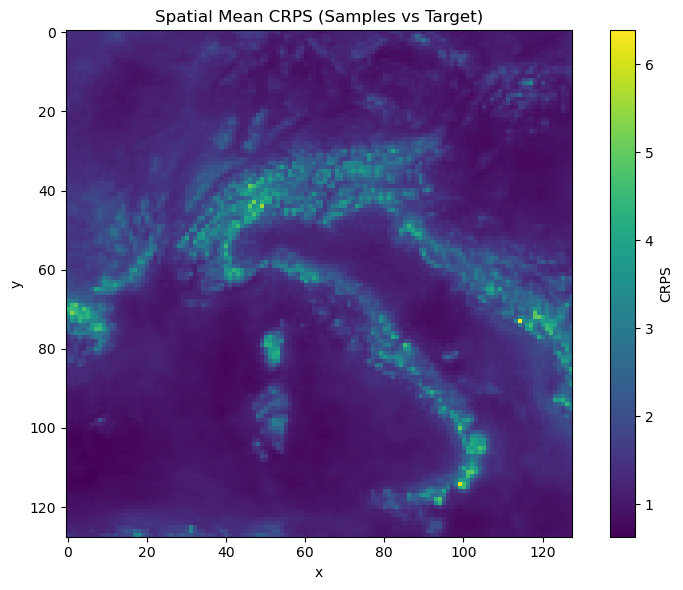

Spatial mean CRPS: 1.405457


In [66]:
from properscoring import crps_ensemble

# Ensure samples and target are aligned in shape for CRPS calculation
# samples_mean: (time, 1, ensemble), target_mean: (time,)
# But we want CRPS over space, so use full spatial fields

# Get samples: (time, ensemble, y, x)
samples_np_subset = samples_np[:1000]  # (time, y, x, ensemble)
target_np = np.flip(target[variable].values, [1])
target_np_subset = target_np[:1000] # (time, y, x)

# Compute CRPS for each grid point and time
crps_map = crps_ensemble(target_np_subset, samples_np_subset)  # shape: (time, y, x)

# Average over time to get spatial CRPS map
crps_spatial = crps_map.mean(axis=0)  # shape: (y, x)

# Plot CRPS map
plt.figure(figsize=(8, 6))
plt.imshow(crps_spatial, cmap='viridis')
plt.colorbar(label='CRPS')
plt.title('Spatial Mean CRPS (Samples vs Target)')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

# Print spatial mean CRPS (average over all grid points)
print("Spatial mean CRPS:", crps_spatial.mean())

CRPS also on test data

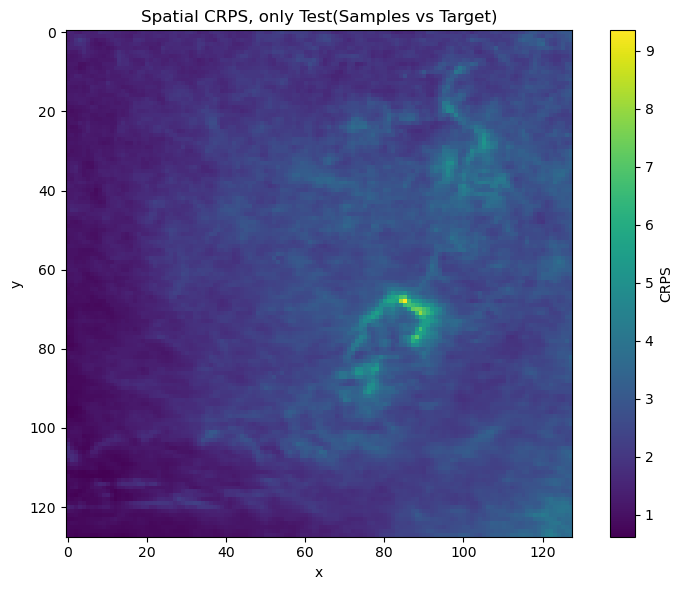

Spatial mean CRPS, only test: 2.2330129998967947


In [35]:
from sklearn.model_selection import train_test_split
train_indices, test_indices = train_test_split(list(range(len(target_np))), test_size = 0.1, random_state = 42) # recover train test split from training

target_only_test = target_np[test_indices]
samples_only_test = samples_np[test_indices]

# Compute CRPS for each grid point and time
crps_map = crps_ensemble(target_only_test, samples_only_test)  # shape: (time, y, x)

# Average over time to get spatial CRPS map
crps_spatial = crps_map.mean(axis=0)  # shape: (y, x)

# Plot CRPS map
plt.figure(figsize=(8, 6))
plt.imshow(crps_spatial, cmap='viridis')
plt.colorbar(label='CRPS')
plt.title('Spatial CRPS, only Test(Samples vs Target)')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

# Print spatial mean CRPS (average over all grid points)
print("Spatial mean CRPS, only test:", crps_spatial.mean())

Warming trend future - past

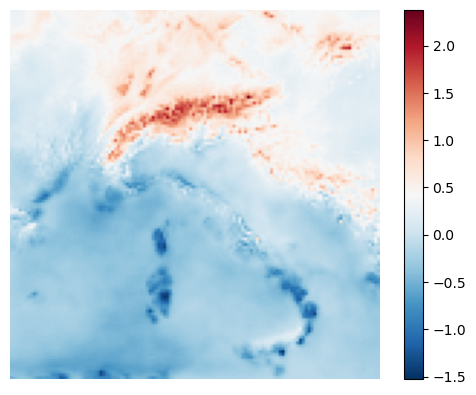

In [45]:
mid = len(samples_np) // 2
mean_past_est = samples_np[:mid].mean(axis=(0, -1))
mean_future_est = samples_np[mid:].mean(axis=(0, -1))
plt.imshow(mean_future_est - mean_past_est, cmap = "RdBu_r");
plt.axis("off");
plt.colorbar();

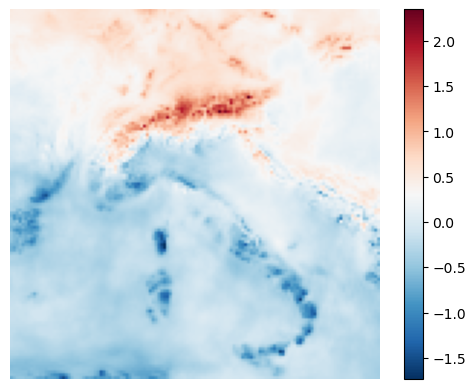

In [46]:
mid = len(samples_np) // 2
mean_past = target_np[:mid].mean(axis=(0))
mean_future = target_np[mid:].mean(axis=(0))
plt.imshow(mean_future - mean_past, cmap = "RdBu_r");
plt.axis("off");
plt.colorbar();

Sum of absolute errors in warming trend: 1873.8716


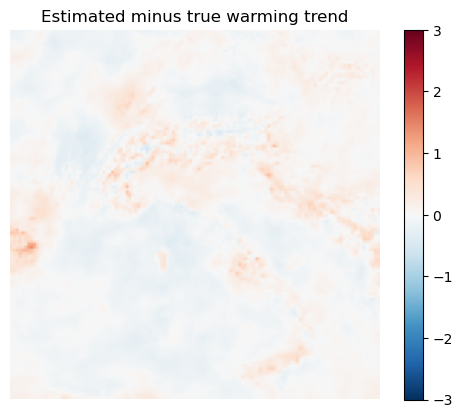

In [47]:
# error in warming trend
plt.imshow((mean_future_est - mean_past_est) - (mean_future - mean_past), cmap = "RdBu_r", vmin=-3, vmax=3);
plt.title("Estimated minus true warming trend");
plt.axis("off");
plt.colorbar();
# absolute errors in warming trend, summed over space
print("Sum of absolute errors in warming trend:", np.abs((mean_future_est - mean_past_est) - (mean_future - mean_past)).sum())

CRPS per period

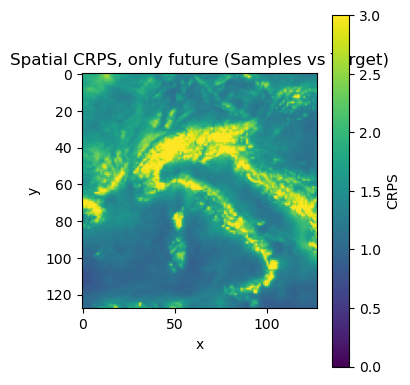

Spatial mean CRPS, only future: 1.6360236
CRPS spatial mean, only future: 0.48826846


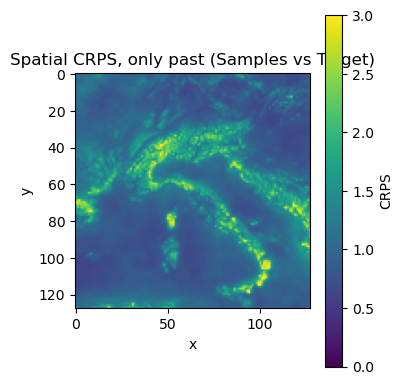

Spatial mean CRPS, only past: 1.1006198
CRPS spatial mean, only past: 0.19267173


In [48]:
train_indices = np.arange(0, (14600//2))
test_indices = np.arange(14600//2 + 1, 14600)
        
target_only_test = target_np[test_indices[:2000]]
samples_only_test = samples_np[test_indices[:2000]]

# Compute CRPS for each grid point and time
crps_map = crps_ensemble(target_only_test, samples_only_test)  # shape: (time, y, x)

# Average over time to get spatial CRPS map
crps_spatial = crps_map.mean(axis=0)  # shape: (y, x)

# Plot CRPS map
plt.figure(figsize=(4, 4))
plt.imshow(crps_spatial, cmap='viridis', vmin=0, vmax=3)
plt.colorbar(label='CRPS')
plt.title('Spatial CRPS, only future (Samples vs Target)')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

# Print spatial mean CRPS (average over all grid points)
print("Spatial mean CRPS, only future:", crps_spatial.mean())

# plot CRPS spatial mean but temporally
# crps_temporal = crps_map.mean(axis=(1, 2))  # shape: (time,)
# plt.figure(figsize=(6, 3))
# plt.plot(crps_temporal)
# plt.xlabel('Time')
# plt.ylabel('CRPS')
# plt.title('Temporal Mean CRPS, only future (Samples vs Target)')
# plt.tight_layout()
# plt.show()

# first spatial mean, then CRPS for past
target_spatial_mean = target_np[test_indices].mean(axis=(1, 2))
samples_spatial_mean = samples_np[test_indices].mean(axis=(1, 2))

crps_spatial_mean = crps_ensemble(target_spatial_mean, samples_spatial_mean)
print("CRPS spatial mean, only future:", crps_spatial_mean.mean())

# repeat only past, i.e. train indices
crps_map = crps_ensemble(target_np[train_indices[:2000]], samples_np[train_indices[:2000]])  # shape: (time, y, x)
# Average over time to get spatial CRPS map
crps_spatial = crps_map.mean(axis=0)  # shape: (y, x)


# Plot CRPS map
plt.figure(figsize=(4, 4))
plt.imshow(crps_spatial, cmap='viridis', vmin=0, vmax=3)
plt.colorbar(label='CRPS')
plt.title('Spatial CRPS, only past (Samples vs Target)')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

# Print spatial mean CRPS (average over all grid points)
print("Spatial mean CRPS, only past:", crps_spatial.mean())

# crps_temporal = crps_map.mean(axis=(1, 2))  # shape: (time,)
# plt.figure(figsize=(6, 3))
# plt.plot(crps_temporal)
# plt.xlabel('Time')
# plt.ylabel('CRPS')
# plt.title('Temporal Mean CRPS, only past (Samples vs Target)')
# plt.tight_layout()
# plt.show()

# first spatial mean, then CRPS for future
target_spatial_mean = target_np[train_indices].mean(axis=(1, 2))
samples_spatial_mean = samples_np[train_indices].mean(axis=(1, 2))
crps_spatial_mean = crps_ensemble(target_spatial_mean, samples_spatial_mean)
print("CRPS spatial mean, only past:", crps_spatial_mean.mean())